# Pseudo Virtual Fields: Neural Networks act as Taylor expansions to find optimal virtual fields via weak equilibrium minimization

In [1]:
import numpy as np
import torch
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from helper_FEBIO import *

In [4]:
import sys
sys.path.insert(0, '../')
from core import *
#config
from config import *
#CUDA
cuda=0
device=initCUDA(cuda)
#supporting files


-----------------------------------------------------
Setting device to:  0
Test:  cuda:0
-----------------------------------------------------



/home/feolalab/anaconda3/envs/NNEUCLID/lib/python3.9/site-packages/torch/__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647380992/work/torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)


# Read FEBIO data

In [5]:

#Read connectivity
connectivity = pd.read_csv("/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/outputs/connectivity")
connectivity

,1,1,9,513,107,44,117,603,368
0,2,9,10,514,513,117,118,604,603
1,3,10,11,515,514,118,119,605,604
2,4,11,12,516,515,119,120,606,605
3,5,12,13,517,516,120,121,607,606
4,6,13,14,518,517,121,122,608,607
...,...,...,...,...,...,...,...,...,...
994,996,1327,1328,354,355,598,599,95,94
995,997,1328,1329,353,354,599,600,96,95
996,998,1329,1330,352,353,600,601,97,96
997,999,1330,1331,351,352,601,602,98,97


### Function to read multiple states from FEBIO file

In [6]:
volume_file="/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/outputs/volume"
volume=read_multi_ste_output2(volume_file,p=True) 

Detected 1-field blocks → ['element']
Number of states: 11
 State 1: element=1000
 State 2: element=1000
 State 3: element=1000
 State 4: element=1000
 State 5: element=1000
 State 6: element=1000
 State 7: element=1000
 State 8: element=1000
 State 9: element=1000
 State 10: element=1000
 State 11: element=1000


In [7]:
area_file="/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/outputs/area"
area=read_multi_ste_output2(area_file,p=True) 

Detected 1-field blocks → ['element']
Number of states: 11
 State 1: element=600
 State 2: element=600
 State 3: element=600
 State 4: element=600
 State 5: element=600
 State 6: element=600
 State 7: element=600
 State 8: element=600
 State 9: element=600
 State 10: element=600
 State 11: element=600


In [8]:
stress_file="/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/outputs/stress"
stress=read_multi_ste_output2(stress_file,p=True)

Detected 6-field blocks → ['xx', 'yy', 'zz', 'xy', 'xz', 'yz']
Number of states: 11
 State 1: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 2: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 3: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 4: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 5: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 6: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 7: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 8: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 9: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 10: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 11: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000


In [9]:
F_file="/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/outputs/F"
F=read_multi_ste_output2(F_file,p=True)

Detected 9-field blocks → ['F11', 'F12', 'F13', 'F21', 'F22', 'F23', 'F31', 'F32', 'F33']
Number of states: 11
 State 1: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 2: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 3: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 4: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 5: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 6: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 7: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 8: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 9: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=100

In [10]:
surface_normal_file="/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/outputs/surface_normal"
surface_normal=read_multi_ste_output2(surface_normal_file,p=True)

Detected 3-field blocks → ['x', 'y', 'z']
Number of states: 11
 State 1: x=600, y=600, z=600
 State 2: x=600, y=600, z=600
 State 3: x=600, y=600, z=600
 State 4: x=600, y=600, z=600
 State 5: x=600, y=600, z=600
 State 6: x=600, y=600, z=600
 State 7: x=600, y=600, z=600
 State 8: x=600, y=600, z=600
 State 9: x=600, y=600, z=600
 State 10: x=600, y=600, z=600
 State 11: x=600, y=600, z=600


### Log file data

In [11]:
#Centroids from log file
centroids_file='/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/Model3.log'
centroids_dict  = parse_states(centroids_file)

#Should get 11 states, each with exactly 1000 x/y/z values:
print("states found:", sorted(centroids_dict.keys()))
for step, d in centroids_dict.items():
    print(f" step {step:2d}: x={len(d['x'])} pts, y={len(d['y'])}, z={len(d['z'])}")

states found: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
 step  0: x=1000 pts, y=1000, z=1000
 step  1: x=1000 pts, y=1000, z=1000
 step  2: x=1000 pts, y=1000, z=1000
 step  3: x=1000 pts, y=1000, z=1000
 step  4: x=1000 pts, y=1000, z=1000
 step  5: x=1000 pts, y=1000, z=1000
 step  6: x=1000 pts, y=1000, z=1000
 step  7: x=1000 pts, y=1000, z=1000
 step  8: x=1000 pts, y=1000, z=1000
 step  9: x=1000 pts, y=1000, z=1000
 step 10: x=1000 pts, y=1000, z=1000


### State dict to tensor

In [12]:
# 1) Build a (Nelements,3,nstates) tensor for centroids:
centroids_tensor = states_to_tensor(centroids_dict, ['x','y','z'])
print("centroids_tensor.shape:", centroids_tensor.shape)
# → (Nelements, 3, nstates)

# 2) Build a (Nelements,6,nstates) tensor for volume‐stress:
stress_tensor = states_to_tensor(stress,
                                ['xx','yy','zz','xy','xz','yz'])
print("stress_tensor.shape:", stress_tensor.shape)
# → (Nelements, 6, nstates)

# 3) If you just want the x‐only channel across states:
#x_only = states_to_tensor(centroids_dict, ['x'])
#print("x_only.shape:", x_only.shape)
# → (Nelements, 1, nstates)

# 3) Volume:
volume_tensor = states_to_tensor(volume, ['element'])
print("volume_tensor.shape:", volume_tensor.shape)
# → (Nelements, 1, nstates)

# 4) Deformation tensor:
F_tensor = states_to_tensor(F, ['F11','F12','F13','F21','F22','F23','F31','F32','F33'])
print("F_tensor.shape:", F_tensor.shape)

# 4) Surface Normal:
surface_normal_tensor = states_to_tensor(surface_normal, ['x','y','z'])
print("surface_normal_tensor.shape:", surface_normal_tensor.shape)


# 5) Area:
area_tensor = states_to_tensor(area, ['element'])
print("area_tensor.shape:", area_tensor.shape)

centroids_tensor.shape: torch.Size([1000, 3, 11])
stress_tensor.shape: torch.Size([1000, 6, 11])
volume_tensor.shape: torch.Size([1000, 1, 11])
F_tensor.shape: torch.Size([1000, 9, 11])
surface_normal_tensor.shape: torch.Size([600, 3, 11])
area_tensor.shape: torch.Size([600, 1, 11])


In [13]:
Nelements=F_tensor.shape[0]

## Where pressure is applied

In [14]:
pressure_nodes = parse_quad4_from_feb("/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/Model3.feb", surface_name="Pressure1")
pressure_node_ids = list(pressure_nodes.keys())

In [15]:
pressure_nodes[1], type(pressure_nodes)

([5, 35, 522, 108], dict)

In [16]:
def map_pressure_to_elements(connectivity, pressure_nodes):
    """
    Parameters
    ----------
    connectivity : list of tuples
        Each tuple is (elem_id, node1, node2, node3, ..., nodeK).
    pressure_nodes : set or list of ints
        Node IDs that carry a pressure boundary condition.

    Returns
    -------
    mapping : dict
        { elem_id: {
            'all_nodes':    [n1, n2, …, nK],
            'pressure_nodes': [ni, …]   # only those nodes in this element with pressure
          }
        }
        Only elements with at least one pressure node are included.
    """
    # convert to set for O(1) membership tests
    P = set(pressure_nodes)

    mapping = {}
    for entry in connectivity:
        elem_id, *nodes = entry
        applied = [n for n in nodes if n in P]
        if applied:
            mapping[elem_id] = {
                'all_nodes':     nodes,
                'pressure_nodes': applied
            }
    return mapping

In [17]:
connectivity_list = [
    tuple(map(int, row))           # ensure ints
    for row in connectivity.values
]

# 2) Flatten pressure-node dict into a set of node IDs
pressure_nodes_set = {
    n
    for nodes in pressure_nodes.values()
    for n in nodes
}

mapping_element_pressure = map_pressure_to_elements(connectivity_list, pressure_nodes_set)
#print(mapping.keys())
# (3) inspect
for eid, info in mapping_element_pressure.items():
    print(f"Element {eid}:")
    print("  all_nodes:     ", info['all_nodes'])
    print("  pressure_nodes:", info['pressure_nodes'])

Element 901:
  all_nodes:      [36, 189, 1251, 440, 5, 35, 522, 108]
  pressure_nodes: [5, 35, 522, 108]
Element 902:
  all_nodes:      [189, 190, 1252, 1251, 35, 34, 523, 522]
  pressure_nodes: [35, 34, 523, 522]
Element 903:
  all_nodes:      [190, 191, 1253, 1252, 34, 33, 524, 523]
  pressure_nodes: [34, 33, 524, 523]
Element 904:
  all_nodes:      [191, 192, 1254, 1253, 33, 32, 525, 524]
  pressure_nodes: [33, 32, 525, 524]
Element 905:
  all_nodes:      [192, 193, 1255, 1254, 32, 31, 526, 525]
  pressure_nodes: [32, 31, 526, 525]
Element 906:
  all_nodes:      [193, 194, 1256, 1255, 31, 30, 527, 526]
  pressure_nodes: [31, 30, 527, 526]
Element 907:
  all_nodes:      [194, 195, 1257, 1256, 30, 29, 528, 527]
  pressure_nodes: [30, 29, 528, 527]
Element 908:
  all_nodes:      [195, 196, 1258, 1257, 29, 28, 529, 528]
  pressure_nodes: [29, 28, 529, 528]
Element 909:
  all_nodes:      [196, 197, 1259, 1258, 28, 27, 530, 529]
  pressure_nodes: [28, 27, 530, 529]
Element 910:
  all_node

In [18]:
pressure_element_IDs=list(mapping_element_pressure.keys())

pressure_element_IDs_final = torch.tensor([nid - 1 for nid in pressure_element_IDs], dtype=torch.long)

#len(pressure_element_IDs_final)

In [20]:

#Get normals of surfaces where pressure is applied
# 1) zero‐based indices for those nodes:
idx = torch.tensor([nid - 1 for nid in pressure_node_ids], dtype=torch.long)

# 2) index into the first dimension:
#    result has shape (100, 3, 11)
pressure_normals = surface_normal_tensor[idx, :, :]
area_normals = area_tensor[idx, :, :]

print(pressure_normals.shape)  # → torch.Size([100, 3, 11])

torch.Size([100, 3, 11])


In [19]:
#print("VF.shape =", VF.shape)
print("max idx =", max(pressure_element_IDs_final).item())
print("min idx =", min(pressure_element_IDs_final).item())


max idx = 999
min idx = 900


# Architecture

In [21]:
from model import *

model = ICNN3D_global_Taylor(n_input=6,
                n_hidden=[64,64,64],
                n_output=30,
                use_dropout=True,
                dropout_rate=0.2)

In [22]:
from torchinfo import summary
model = model.to(device)
summary(model)

Layer (type:depth-idx)                   Param #
ICNN3D_global_Taylor                     --
├─ModuleDict: 1-1                        --
│    └─Linear: 2-1                       448
│    └─convexLinear: 2-2                 4,096
│    └─convexLinear: 2-3                 4,096
│    └─convexLinear: 2-4                 1,920
├─ModuleDict: 1-2                        --
│    └─Linear: 2-5                       448
│    └─Linear: 2-6                       448
│    └─convexLinear: 2-7                 180
├─AdaptiveAvgPool1d: 1-3                 --
Total params: 11,636
Trainable params: 11,636
Non-trainable params: 0

## Training loop

In [23]:
F_tensor.shape, stress_tensor.shape, centroids_tensor.shape

(torch.Size([1000, 9, 11]),
 torch.Size([1000, 6, 11]),
 torch.Size([1000, 3, 11]))

In [24]:
x_input= torch.cat(( F_tensor.to(device),centroids_tensor.to(device)), dim=1)
x_input.shape

torch.Size([1000, 12, 11])

In [25]:
def calculate_point(centroids, state):
    delta=centroids[:,:,state]-centroids[:,:,0]
    return delta

In [26]:
def construct_VF(V_NN,delta_xyz):
    Vf = (
        V_NN[0]
        + V_NN[1] * delta_xyz[:,0]
        + V_NN[2] * delta_xyz[:,1]
        + V_NN[3] * delta_xyz[:,2]
        + V_NN[4] * delta_xyz[:,0]**2
        + V_NN[5] * delta_xyz[:,1]**2
        + V_NN[6] * delta_xyz[:,2]**2
        + V_NN[7] * (delta_xyz[:,0] * delta_xyz[:,1])
        + V_NN[8] * (delta_xyz[:,0] * delta_xyz[:,2])
        + V_NN[9] * (delta_xyz[:,1] * delta_xyz[:,2])
    )
    return Vf

In [27]:
def construct_VF_gradients(V_NN: torch.Tensor, delta_xyz: torch.Tensor) -> torch.Tensor:
    """
    V_NN:  either shape (30,), (30,1), or (1,30)
    delta_xyz: shape (Nelements, 3)
    returns grad_V of shape (Nelements, 3, 3)
    """
    # flatten to (30,)
    coeffs = V_NN.squeeze()
    if coeffs.numel() != 30:
        raise ValueError(f"expected 30 coefficients, got {coeffs.shape}")

    dx = delta_xyz[:, 0]
    dy = delta_xyz[:, 1]
    dz = delta_xyz[:, 2]

    # split into three 10-coefficient chunks
    a = coeffs[ 0:10]  # Vx
    b = coeffs[10:20]  # Vy
    c = coeffs[20:30]  # Vz

    # alias the ones we need
    a1,a2,a3 = a[1],a[2],a[3]
    a4,a5,a6 = a[4],a[5],a[6]
    a7,a8,a9 = a[7],a[8],a[9]

    b1,b2,b3 = b[1],b[2],b[3]
    b4,b5,b6 = b[4],b[5],b[6]
    b7,b8,b9 = b[7],b[8],b[9]

    c1,c2,c3 = c[1],c[2],c[3]
    c4,c5,c6 = c[4],c[5],c[6]
    c7,c8,c9 = c[7],c[8],c[9]

    # compute the nine partials
    dVx_dx = -a1 - 2*a4*dx -    a7*dy -    a8*dz
    dVx_dy = -a2 -    a7*dx - 2*a5*dy -    a9*dz
    dVx_dz = -a3 -    a8*dx -    a9*dy - 2*a6*dz

    dVy_dx = -b1 - 2*b4*dx -    b7*dy -    b8*dz
    dVy_dy = -b2 -    b7*dx - 2*b5*dy -    b9*dz
    dVy_dz = -b3 -    b8*dx -    b9*dy - 2*b6*dz

    dVz_dx = -c1 - 2*c4*dx -    c7*dy -    c8*dz
    dVz_dy = -c2 -    c7*dx - 2*c5*dy -    c9*dz
    dVz_dz = -c3 -    c8*dx -    c9*dy - 2*c6*dz

    # pack into (Nelements, 3, 3)
    row1 = torch.stack((dVx_dx, dVx_dy, dVx_dz), dim=1)
    row2 = torch.stack((dVy_dx, dVy_dy, dVy_dz), dim=1)
    row3 = torch.stack((dVz_dx, dVz_dy, dVz_dz), dim=1)
    
    return torch.stack((row1, row2, row3), dim=1)

In [28]:
N = stress_tensor.shape[0]
stress_tensor_3d = torch.zeros(N, 3, 3,11,
                device=stress_tensor.device,
                dtype=stress_tensor.dtype)

# diagonals
stress_tensor_3d[:,0,0] = stress_tensor[:,0]   # stress_tensor_3d_xx
stress_tensor_3d[:,1,1] = stress_tensor[:,1]   # stress_tensor_3d_yy
stress_tensor_3d[:,2,2] = stress_tensor[:,2]   # stress_tensor_3d_zz

# off‐diagonals (symmetric)
stress_tensor_3d[:,0,1] = stress_tensor[:,3]   # stress_tensor_3d_xy
stress_tensor_3d[:,1,0] = stress_tensor[:,3]

stress_tensor_3d[:,0,2] = stress_tensor[:,4]   # stress_tensor_3d_xz
stress_tensor_3d[:,2,0] = stress_tensor[:,4]

stress_tensor_3d[:,1,2] = stress_tensor[:,5]   # stress_tensor_3d_yz
stress_tensor_3d[:,2,1] = stress_tensor[:,5]

In [29]:
stress_tensor_3d.shape

torch.Size([1000, 3, 3, 11])

In [41]:
epoch=500
# Adam with a learning rate:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
#Number of states:
states=x_input.shape[2]

for i in range(epoch):
    optimizer.zero_grad()#reset gradients
    loss = torch.tensor([0.])
    #Estimate
    for s in range(1,states):
        V_NN=model(x_input[:,:,s]) #This is N elements x9 

        delta_xyz=calculate_point(centroids_tensor, s) #This is N elements x3

        Vx=construct_VF(V_NN[0:10],delta_xyz)
        Vy=construct_VF(V_NN[10:20],delta_xyz)
        Vz=construct_VF(V_NN[20:30],delta_xyz)

        VF=torch.cat((Vx.unsqueeze(1),Vy.unsqueeze(1),Vz.unsqueeze(1)), dim=1)
        grad_VF= construct_VF_gradients(V_NN, delta_xyz)

        #Strain
        virtual_strain=0.5*(grad_VF+grad_VF.transpose(1,2))

        #Volume integral:
        # element‐wise inner product σ^e : ∇v^e
        integrand = torch.sum(stress_tensor_3d[:,:,:,s] * virtual_strain, dim=(1, 2))  # → shape [N]

        a_uv = torch.sum(integrand * volume_tensor[:,:,s])  # scalar


        # 3) Build the traction vector T_surf = [0, 0, -1000] for each boundary element:
       # T_surf = torch.tensor([0.0, 0.0, -1000.0], device=device)  # [3]
       # T_surf = T_surf.view(1,3).expand(Nelements, 3)  # → [nB, 3]
        t_surface=pressure_normals[:,:,s]*1000 #normal times scalar amount tells quantity



        L_uv=torch.sum(t_surface*VF[pressure_element_IDs_final,:]*area_normals[:,:,s])

        #Loss:
        loss+=(a_uv-L_uv)*1e-4

    if i%10==0:
        print(f'Epoch {i} loss: {loss.item()}')

    loss.backward()

    optimizer.step()

Epoch 0 loss: 3547.1393432617188
Epoch 10 loss: 3466.056297302246
Epoch 20 loss: 3388.6058807373047
Epoch 30 loss: 3307.7913703918457
Epoch 40 loss: 3235.6099815368652
Epoch 50 loss: 3164.383689880371
Epoch 60 loss: 3096.6606407165527
Epoch 70 loss: 3028.5219650268555
Epoch 80 loss: 2965.4825477600098
Epoch 90 loss: 2905.0577697753906
Epoch 100 loss: 2845.9170684814453
Epoch 110 loss: 2791.0321350097656
Epoch 120 loss: 2733.3977241516113
Epoch 130 loss: 2681.7697944641113
Epoch 140 loss: 2631.2842979431152
Epoch 150 loss: 2581.312187194824
Epoch 160 loss: 2532.5510597229004
Epoch 170 loss: 2486.8219451904297
Epoch 180 loss: 2441.5628929138184
Epoch 190 loss: 2397.986747741699
Epoch 200 loss: 2353.6158752441406
Epoch 210 loss: 2314.6105880737305
Epoch 220 loss: 2273.7650413513184
Epoch 230 loss: 2235.8950958251953
Epoch 240 loss: 2198.2298126220703
Epoch 250 loss: 2161.154567718506
Epoch 260 loss: 2124.2845344543457
Epoch 270 loss: 2088.6140632629395
Epoch 280 loss: 2057.464744567871
Ep

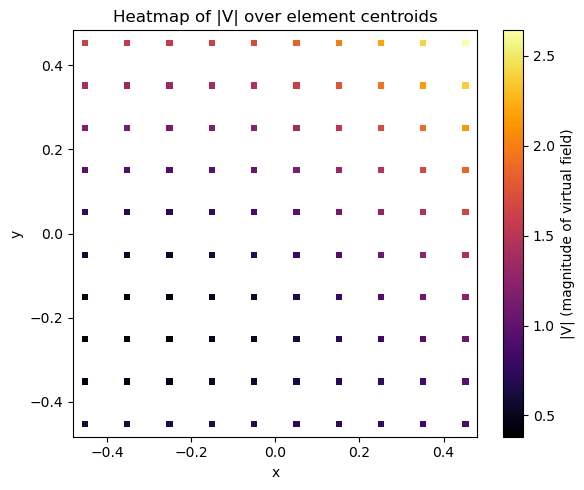

In [42]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# ── (Assume these are already in your workspace) ──
# centroids:  (Nelements, 3) torch.Tensor [x_i, y_i, z_i]
# VF:         (Nelements, 3) torch.Tensor [Vx_i, Vy_i, Vz_i]

# 1) Convert to NumPy (if they’re still PyTorch tensors)
centroids_np = centroids_tensor[pressure_element_IDs_final,:,10].detach().cpu().numpy()  # (Nelements, 3)
VF_np        = VF[pressure_element_IDs_final,:].detach().cpu().numpy()         # (Nelements, 3)

# 2) Extract x, y, and compute magnitude
x = centroids_np[:, 0]      # (Nelements,)
y = centroids_np[:, 1]      # (Nelements,)

# magnitude of the 3‐D virtual field vector at each centroid:
mag = np.sqrt((VF_np**2).sum(axis=1))  # (Nelements,)

# 3) Make a scatter “heatmap” on the xy‐plane, colored by |V|
plt.figure(figsize=(6,5))
sc = plt.scatter(
    x, 
    y, 
    c=mag, 
    cmap="inferno",     # you can choose "viridis", "plasma", etc.
    s=20,               # marker size: tweak if too big/small
    marker="s",         # square markers often look more heatmap‐like
    edgecolors="none"
)
plt.colorbar(sc, label="|V| (magnitude of virtual field)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Heatmap of |V| over element centroids")
plt.axis("equal")       # ensures x- and y-scales match
plt.tight_layout()
plt.show()


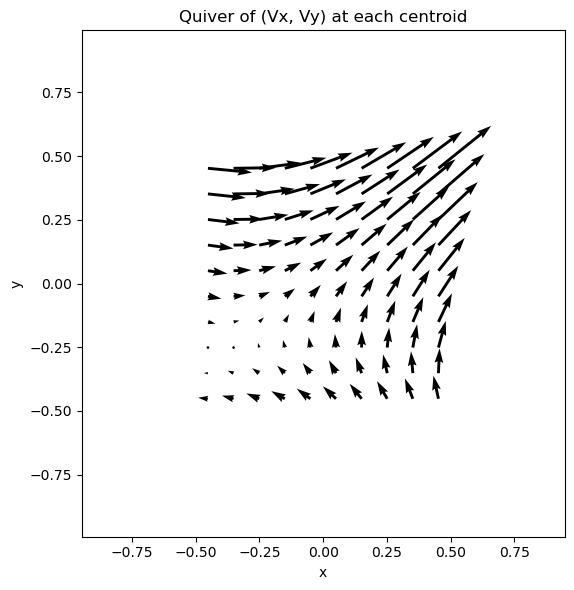

In [45]:
x = centroids_np[:, 0]   # (Nelements,)
y = centroids_np[:, 1]   # (Nelements,)
u = VF_np[:, 0]          # Vx at each centroid
v = VF_np[:, 1]          # Vy at each centroid

plt.figure(figsize=(6,6))
plt.quiver(
    x, y,       # arrow‐base positions
    u, v,       # arrow components
    angles="xy", scale_units="xy")
plt.axis("equal")    # so that 1 unit in x = 1 unit in y
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-1, 1)      # show only from -1 to 1 in x
plt.ylim(-1, 1)      # show only from -1 to 1 in y
plt.title("Quiver of (Vx, Vy) at each centroid")
plt.tight_layout()
plt.show()